# Part 1

**Generate a set of true means**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import decimal
import random

# Step 1: Generate ten means from N(0, 1) distribution
np.random.seed(71)  # For reproducibility

# The true reward corresponding to each action (Pulling a lever arm) is sampled from a normal distribution with mean 0 and variance 1
true_means = np.random.normal(0, 1, 10)

# Number of arms
n_arms = 10

# Initialize action value estimates to 0
Q = np.zeros(n_arms)

# Initialize action counts to 0
N = np.zeros(n_arms)

# Number of iterations
iterations = 1000

# Track rewards
rewards = []
action_indices = np.arange(0,10)

In [ ]:
# Print the true means for comparison
print("True means μ:")
print(true_means)

True means μ:
[-0.43060315 -1.19392809 -0.44429899  0.48941221 -0.45155715  0.58569596
  1.17731982 -0.96500906  0.21827791 -0.86614368]


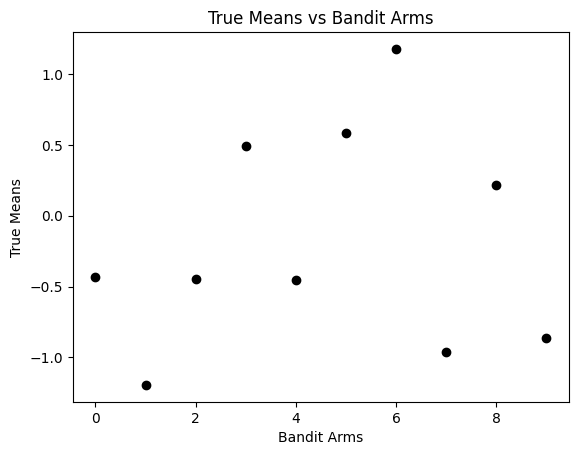

In [ ]:
plt.plot(np.arange(0,10), true_means,'o', color='black')
plt.xlabel('Bandit Arms')
plt.ylabel('True Means')
plt.title('True Means vs Bandit Arms')
plt.show()

**Greedy Approach** *- This is the vanilla greedy approach where the algorithm mostly exploits a high-valued action instead of exploring newer actions.*

In [ ]:
import numpy as np

# Parameters
n_problems = 1000  # Number of different bandit problems
n_arms = 10  # Number of arms
iterations = 1000  # Number of iterations per problem
np.random.seed(71)  # For reproducibility

# Function to run the greedy algorithm for one bandit problem
def greedy_bandit(true_means, iterations, apply_gradual_changes = False, apply_abrupt_changes = False, epsilon_t_upper_limit = 0.0001, k = 1):
    true_means_internal = true_means.copy()
    Q = np.zeros(n_arms)
    N = np.zeros(n_arms)
    rewards = np.zeros(iterations)
    optimal_actions = np.zeros(iterations)

    optimal_action = np.argmax(true_means_internal)
    # print(optimal_action)

    for t in range(iterations):
        epsilon_t = np.random.normal(0, epsilon_t_upper_limit)
        # Greedy action selection
        action = np.argmax(Q)

        # Check if the selected action is the optimal action
        if action == optimal_action:
            optimal_actions[t] = 1

        # Get reward
        reward = np.random.normal(true_means_internal[action], 1)
        if apply_gradual_changes:
            true_means_internal[action] = k * true_means_internal[action] + epsilon_t
        if apply_abrupt_changes:
            abrupt_change_prob = float(decimal.Decimal(random.randrange(1, 1000))/1000)
            if abrupt_change_prob <= 0.005:
                true_means_internal = np.random.normal(0, 1, 10)
        rewards[t] = reward

        # Update counts and values
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]

    return rewards, optimal_actions

# Arrays to store results across all problems
all_rewards = np.zeros((n_problems, iterations))
all_optimal_actions = np.zeros((n_problems, iterations))

# Run the bandit problems
for i in range(n_problems):
    # Generate true means for the current problem
    true_means = np.random.normal(0, 1, n_arms)

    # Run the greedy algorithm
    rewards, optimal_actions = greedy_bandit(true_means, iterations)

    # Store results
    all_rewards[i, :] = rewards
    all_optimal_actions[i, :] = optimal_actions

# Calculate average reward at each time step
average_rewards = np.mean(all_rewards, axis=0)

# Calculate the percentage of time the optimal action is taken at each time step
optimal_action_percentage = np.mean(all_optimal_actions, axis=0) * 100

# Display the results
# print("Average reward at each time step:")
# print(average_rewards)

# print("\nPercentage of time the optimal action is taken at each time step:")
# print(optimal_action_percentage)


Average reward at each time step:
[0.01425848 0.20754244 0.41123858 0.54608631 0.57172866 0.64568292
 0.79683709 0.7780611  0.77124659 0.80405158 0.80305985 0.85927195
 0.88073662 0.83769651 0.96134501 0.99169585 0.94679659 0.91685202
 1.0183965  0.97777051 0.93833853 0.90541993 0.97181845 0.9777426
 0.97300441 1.00097123 1.00033507 0.97136716 0.94591269 0.97590076
 0.90487492 1.03018249 0.94102168 0.94432812 0.96436851 1.05847653
 0.96382964 1.03349655 0.99247904 0.97823611 0.98298422 1.04570754
 0.98550613 0.94635468 0.98817588 0.99255896 0.97042147 0.97723753
 0.95675755 0.98117117 1.02897126 1.02676267 1.03426458 0.98096807
 1.05854092 0.96601555 1.00345842 1.01932932 0.99725119 0.99699754
 0.9561445  0.96920865 0.98186173 1.04674585 1.03885629 0.97915159
 1.02073333 0.96411537 1.00121894 1.06802638 0.99725279 1.04770163
 0.96503977 0.98051884 1.08946697 0.98288426 1.01162961 1.05566059
 1.00381482 1.04419809 0.99178034 0.98650408 1.03357628 1.06852268
 1.05043389 1.0120579  1.0796

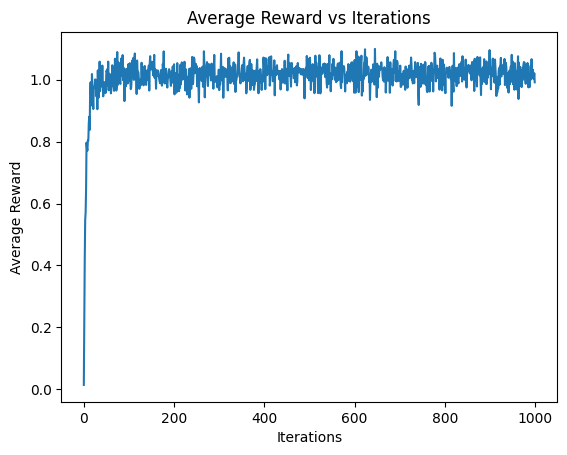

In [ ]:
plt.plot(np.arange(iterations),average_rewards)
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Iterations')
plt.show()

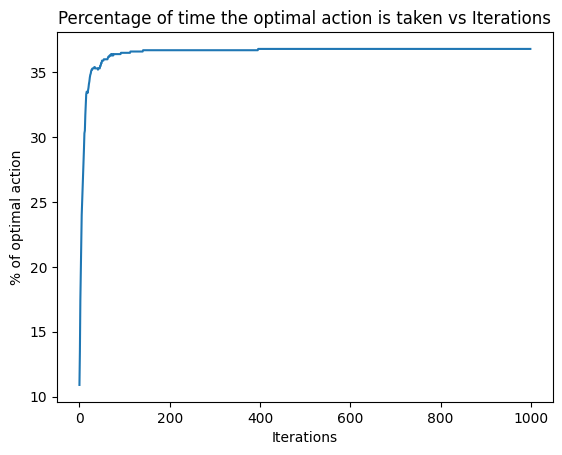

In [ ]:
plt.plot(np.arange(iterations),optimal_action_percentage)
plt.xlabel('Iterations')
plt.ylabel('% of optimal action')
plt.title('Percentage of time the optimal action is taken vs Iterations')
plt.show()

**Epsiolon Greedy approach with 7 pilot runs** *- This algorithm is a modification of the greedy algorithm where the agent can also take a random action based on the value of an hyperparameter epsilon.*

In [ ]:
# Produce a testbed of 1000 bandit problems
np.random.seed(71)  # For reproducibility
n_bandit = 1000
n_lever = 10
steps = 1000

testbed = np.random.normal(0,1,(n_bandit,n_lever))
reward_estimates = np.zeros((n_bandit,n_lever))
action_count = np.ones((n_bandit,n_lever))  # each lever is pulled atleast once
initial_reward_estimates =  np.random.normal(testbed,1)

In [ ]:
def epsilon_greedy(steps, n_bandit, n_lever, testbed, initial_reward_estimates, epsilon, apply_gradual_changes = False, apply_fixed_step_size_changes = False, fixed_step_size = 0.2, apply_abrupt_changes = False, epsilon_t_upper_limit = 0.0001, k = 1):
    testbed_internal = testbed.copy()
    action_count = np.ones((n_bandit,n_lever))  # each lever is pulled atleast once
    reward_estimates = np.zeros((n_bandit,n_lever))  # _per_pull_per_bandit

    avg_rewards_per_step = []
    avg_rewards_per_step.append(0)
    avg_rewards_per_step.append(np.mean(initial_reward_estimates)) # step 1

    for step in range(2,steps):
        reward_sum_over_all_bandits_per_step = 0
        for problem_index in range(n_bandit):
            epsilon_t = np.random.normal(0, epsilon_t_upper_limit)
            if np.random.random() > epsilon:
                maxval = np.amax(reward_estimates[problem_index])
                max_val_indices = np.ravel(np.array(np.where(reward_estimates[problem_index] == maxval)))
                random_choice = np.random.choice(max_val_indices) # Breaking ties randomly
            else :
                 random_choice = np.random.randint(n_lever)

            # Incremental Algorithm
            Rn = np.random.normal(testbed_internal[problem_index][random_choice],1)
            if apply_gradual_changes:
                testbed_internal[problem_index][random_choice] = k * testbed_internal[problem_index][random_choice] + epsilon_t
            if apply_abrupt_changes:
                abrupt_change_prob = float(decimal.Decimal(random.randrange(1, 1000))/1000)
                if abrupt_change_prob <= 0.005:
                    testbed_internal = np.random.normal(0, 1, (n_bandit, n_lever))
            n = action_count[problem_index][random_choice]
            Qn = reward_estimates[problem_index][random_choice]

            Qnew = (Qn + (fixed_step_size) * (Rn - Qn)) if apply_fixed_step_size_changes else (Rn + (n - 1) * Qn) / n

            reward_estimates[problem_index][random_choice] = Qnew
            action_count[problem_index][random_choice] = n+1

            reward_sum_over_all_bandits_per_step += Qnew


        avg_rewards_per_step.append((reward_sum_over_all_bandits_per_step)/n_bandit)
    return avg_rewards_per_step

Text(0.5, 1.0, 'Average Reward vs Steps')

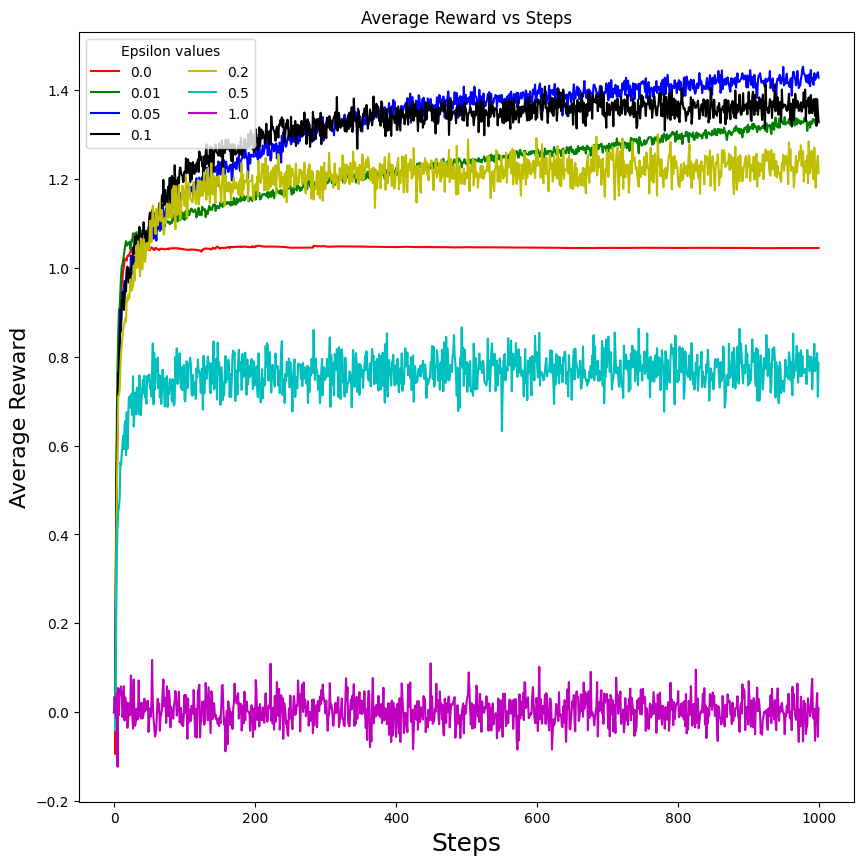

In [ ]:
epsilons= [0.0, 0.01, 0.05, 0.1, 0.2, 0.5, 1.0]
colours = ['r', 'g', 'b', 'k', 'y', 'c', 'm']

plt.figure(figsize=(10,10))
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Average Reward', fontsize=16)

for index,eps in enumerate(epsilons):
    avg_rewards_per_step = epsilon_greedy(steps, n_bandit, n_lever, testbed, initial_reward_estimates, eps)
    plt.plot(np.arange(steps),avg_rewards_per_step,label=eps, color=colours[index])

plt.legend(loc=2, ncol=2, title = 'Epsilon values')
plt.title('Average Reward vs Steps')

*Here we choose Epsilon value 0.05 based on above pilot runs*

In [ ]:
# Function to run the epsilon-greedy algorithm for one bandit problem
def run_epsilon_greedy_bandit(true_means, epsilon, iterations, apply_gradual_changes = False, apply_abrupt_changes = False, epsilon_t_upper_limit = 0.0001, k = 1):
    true_means_internal = true_means.copy()
    Q = np.zeros(n_arms)
    N = np.zeros(n_arms)
    rewards = np.zeros(iterations)
    optimal_actions = np.zeros(iterations)

    optimal_action = np.argmax(true_means_internal)

    for t in range(iterations):
        epsilon_t = np.random.normal(0, epsilon_t_upper_limit)
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = np.random.choice(n_arms)
        else:
            action = np.argmax(Q)

        # Check if the selected action is the optimal action
        if action == optimal_action:
            optimal_actions[t] = 1

        # Get reward
        reward = np.random.normal(true_means_internal[action], 1)
        if apply_gradual_changes:
            true_means_internal[action] = k * true_means_internal[action] + epsilon_t
        if apply_abrupt_changes:
            abrupt_change_prob = float(decimal.Decimal(random.randrange(1, 1000))/1000)
            if abrupt_change_prob <= 0.005:
                true_means_internal = np.random.normal(0, 1, 10)
        rewards[t] = reward

        # Update counts and values
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]

    return rewards, optimal_actions


In [ ]:
n_problems = 1000  # Number of different bandit problems
chosen_epsilon = 0.05  # Chosen epsilon value from pilot runs
iterations = 2000

# Arrays to store results across all problems
all_rewards = np.zeros((n_problems, iterations))
all_optimal_actions = np.zeros((n_problems, iterations))

# Run the bandit problems
for i in range(n_problems):
    # Generate true means for the current problem
    true_means = np.random.normal(0, 1, n_arms)

    # Run the epsilon-greedy algorithm with the chosen epsilon
    rewards, optimal_actions = run_epsilon_greedy_bandit(true_means, chosen_epsilon, iterations)

    # Store results
    all_rewards[i, :] = rewards
    all_optimal_actions[i, :] = optimal_actions

# Calculate average reward at each time step
average_rewards = np.mean(all_rewards, axis=0)

# Calculate the percentage of time the optimal action is taken at each time step
optimal_action_percentage = np.mean(all_optimal_actions, axis=0) * 100

# Display the results
# print("Average reward at each time step:")
# print(average_rewards)

# print("\nPercentage of time the optimal action is taken at each time step:")
# print(optimal_action_percentage)


Average reward at each time step:
[-0.00357181  0.19410762  0.38480304 ...  1.42891016  1.4045039
  1.46212271]

Percentage of time the optimal action is taken at each time step:
[ 9.  13.  17.4 ... 83.6 83.2 84.2]


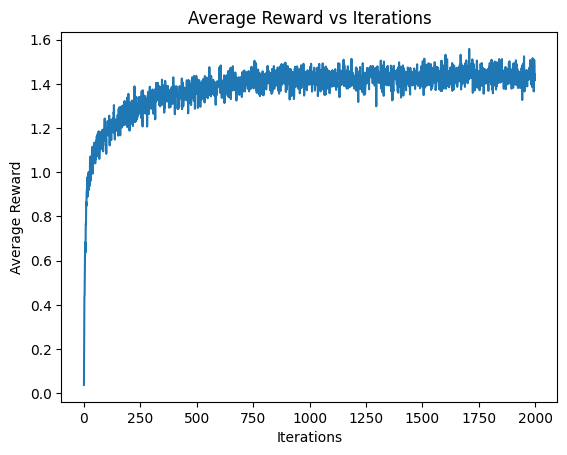

In [ ]:
plt.plot(np.arange(iterations),average_rewards)
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Iterations')
plt.show()

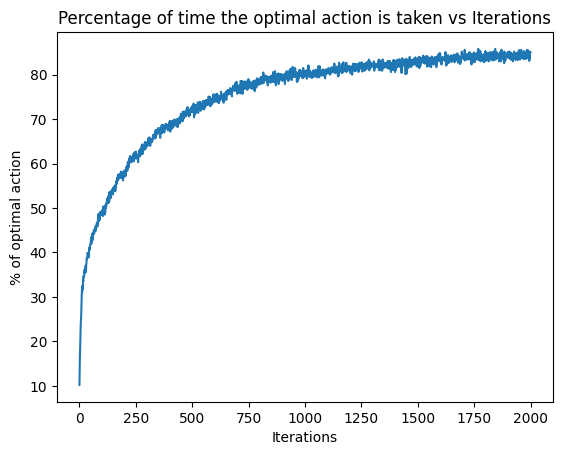

In [ ]:
plt.plot(np.arange(iterations),optimal_action_percentage)
plt.xlabel('Iterations')
plt.ylabel('% of optimal action')
plt.title('Percentage of time the optimal action is taken vs Iterations')
plt.show()

**Greedy with optimistic starting values** *- This algorithm is another simple modification of the greedy algorithm where the reward values are optimistic rather than zero as used in the vanilla greedy algorithm.*

In [ ]:
def optimistic_greedy(steps, n_bandit, n_lever, testbed, initial_value, initial_reward_estimates, epsilon, apply_gradual_changes = False, apply_abrupt_changes = False, epsilon_t_upper_limit = 0.0001, k = 1):
    testbed_internal = testbed.copy()
    action_count = np.ones((n_bandit,n_lever))  # each lever is pulled atleast once
    reward_estimates = np.ones((n_bandit,n_lever)) * initial_value  # _per_pull_per_bandit

    avg_rewards_per_step = []
    avg_rewards_per_step.append(0)
    avg_rewards_per_step.append(np.mean(initial_reward_estimates)) # step 1

    for step in range(2, steps):
        reward_sum_over_all_bandits_per_step = 0
        for problem_index in range(n_bandit):
            epsilon_t = np.random.normal(0, epsilon_t_upper_limit)
            if np.random.random() > epsilon:
                maxval = np.amax(reward_estimates[problem_index])
                max_val_indices = np.ravel(np.array(np.where(reward_estimates[problem_index] == maxval)))
                random_choice = np.random.choice(max_val_indices) # Breaking ties randomly
            else:
                 random_choice = np.random.randint(n_lever)

            # Incremental Algorithm
            Rn = np.random.normal(testbed_internal[problem_index][random_choice],1)
            if apply_gradual_changes:
                testbed_internal[problem_index][random_choice] = k * testbed_internal[problem_index][random_choice] + epsilon_t
            if apply_abrupt_changes:
                abrupt_change_prob = float(decimal.Decimal(random.randrange(1, 1000))/1000)
                if abrupt_change_prob <= 0.005:
                    testbed_internal = np.random.normal(0, 1, (n_bandit, n_lever))
            n = action_count[problem_index][random_choice]
            Qn = reward_estimates[problem_index][random_choice]

            Qnew = (Qn + (Rn - Qn)/n)

            reward_estimates[problem_index][random_choice] = Qnew
            action_count[problem_index][random_choice] = n+1

            reward_sum_over_all_bandits_per_step += Qnew


        avg_rewards_per_step.append((reward_sum_over_all_bandits_per_step)/n_bandit)
    return avg_rewards_per_step

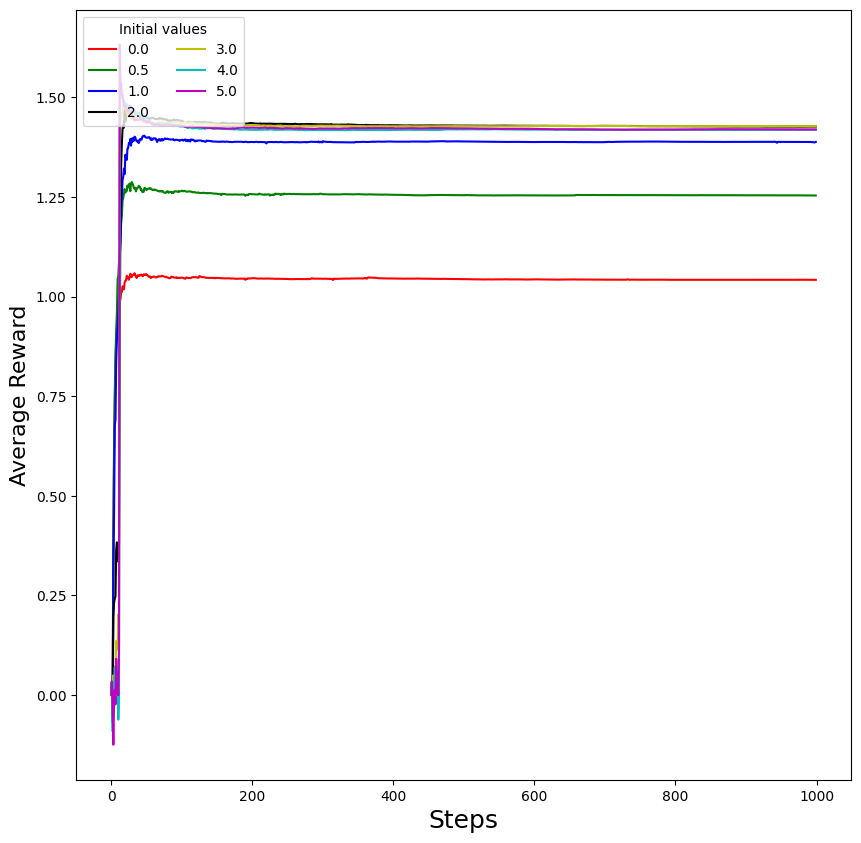

In [ ]:
epsilon = 0.0
colours = ['r', 'g', 'b', 'k', 'y', 'c', 'm']
initial_value = [0.0, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0]

plt.figure(figsize=(10,10))
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Average Reward', fontsize=16)

for index,initial_value in enumerate(initial_value):
    avg_rewards_per_step = optimistic_greedy(steps, n_bandit, n_lever, testbed, initial_value, initial_reward_estimates, epsilon)
    plt.plot(np.arange(steps),avg_rewards_per_step,label=initial_value, color=colours[index])

plt.legend(loc=2, ncol=2, title = 'Initial values')
plt.show()

*Within 200 steps the agents reach near the optimal actimals that generate the optimal rewards, however, when we started out with an initial value of 1, the agents reached the optimal rewards much faster (within almost 20 steps).*

*Comparing the Optimistic Initial Values and Epsilon Greedy approaches*

In [ ]:
np.random.seed(71)

def optimistic_greedy_2(steps, n_bandit, n_lever, testbed, initial_value, initial_reward_estimates, epsilon, global_rewards):
    action_count = np.ones((n_bandit,n_lever))  # each lever is pulled atleast once
    reward_estimates = np.ones((n_bandit,n_lever)) * initial_value  # _per_pull_per_bandit

    avg_rewards_per_step = []
    optimal_choice_per_step = []
    avg_rewards_per_step.append(0)
    avg_rewards_per_step.append(np.mean(initial_reward_estimates)) # step 1

    for step in range(2, steps):
        sum_of_optimal_choice = 0
        reward_sum_over_all_bandits_per_step = 0
        for problem_index in range(n_bandit):
            if np.random.random() > epsilon:
                maxval = np.amax(reward_estimates[problem_index])
                max_val_indices = np.ravel(np.array(np.where(reward_estimates[problem_index] == maxval)))
                random_choice = np.random.choice(max_val_indices) # Breaking ties randomly
            else :
                 random_choice = np.random.randint(n_lever)

            if random_choice == np.argmax(testbed[problem_index]):
                sum_of_optimal_choice += 1

            # Incremental Algorithm
            Rn = np.random.normal(testbed[problem_index][random_choice],1)
            n = action_count[problem_index][random_choice]
            Qn = reward_estimates[problem_index][random_choice]

            Qnew = Qn + (Rn - Qn)/n

            reward_estimates[problem_index][random_choice] = Qnew
            action_count[problem_index][random_choice] = n+1

            reward_sum_over_all_bandits_per_step += Qnew
            reward_estimates[problem_index][random_choice] = Qnew
            action_count[problem_index][random_choice] = n+1

        optimal_choice_per_step.append((sum_of_optimal_choice/n_bandit)*100)
        avg_rewards_per_step.append((reward_sum_over_all_bandits_per_step)/n_bandit)
    global_rewards.append(optimal_choice_per_step)
    return avg_rewards_per_step
# Produce a testbed of 1000 bandit problems
np.random.seed(71)
n_bandit = 1000
n_lever = 10
steps = 1000

testbed = np.random.normal(0,1,(n_bandit,n_lever))
initial_reward_estimates =  np.random.normal(testbed,1)

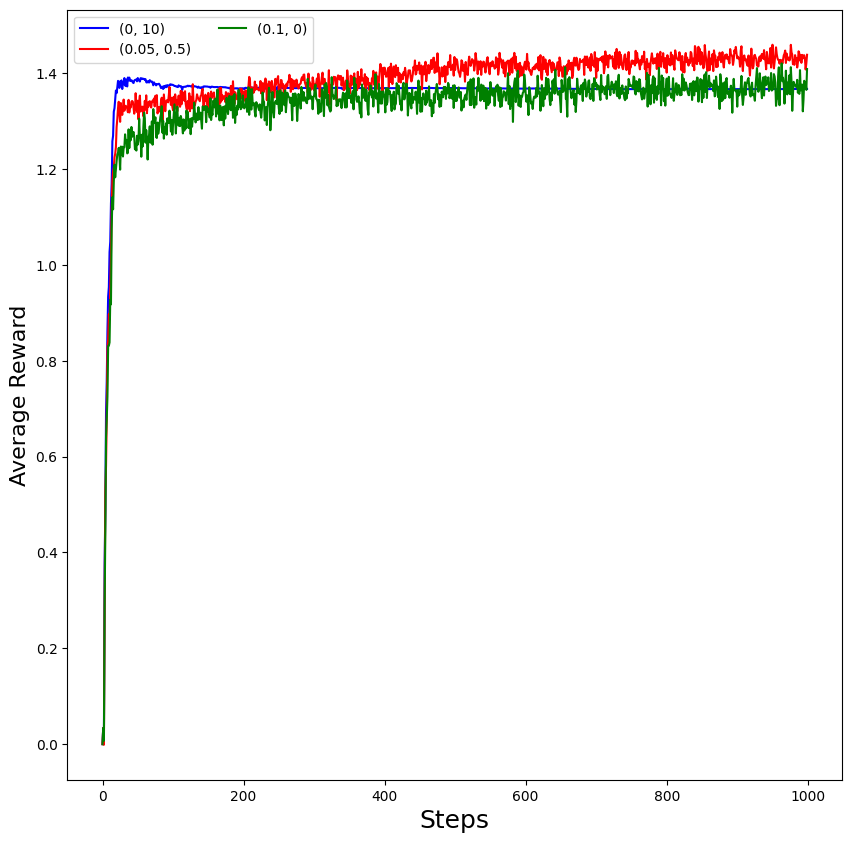

In [ ]:

epsilons      =    [0,    0.05,   0.1]
initial_values    =    [10,   0.5,    0]
colours        =    ['b',   'r',  'g']
reward_list       =    []

plt.figure(figsize=(10,10))
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Average Reward', fontsize=16)

for index, eps in enumerate(epsilons):
    avg_rewards_per_step = optimistic_greedy_2(steps, n_bandit, n_lever, testbed, initial_value, initial_reward_estimates, eps, reward_list)
    plt.plot(np.arange(steps),avg_rewards_per_step,label=(epsilons[index],initial_values[index]), color=colours[index])

plt.legend(loc=2, ncol=2)
plt.show()

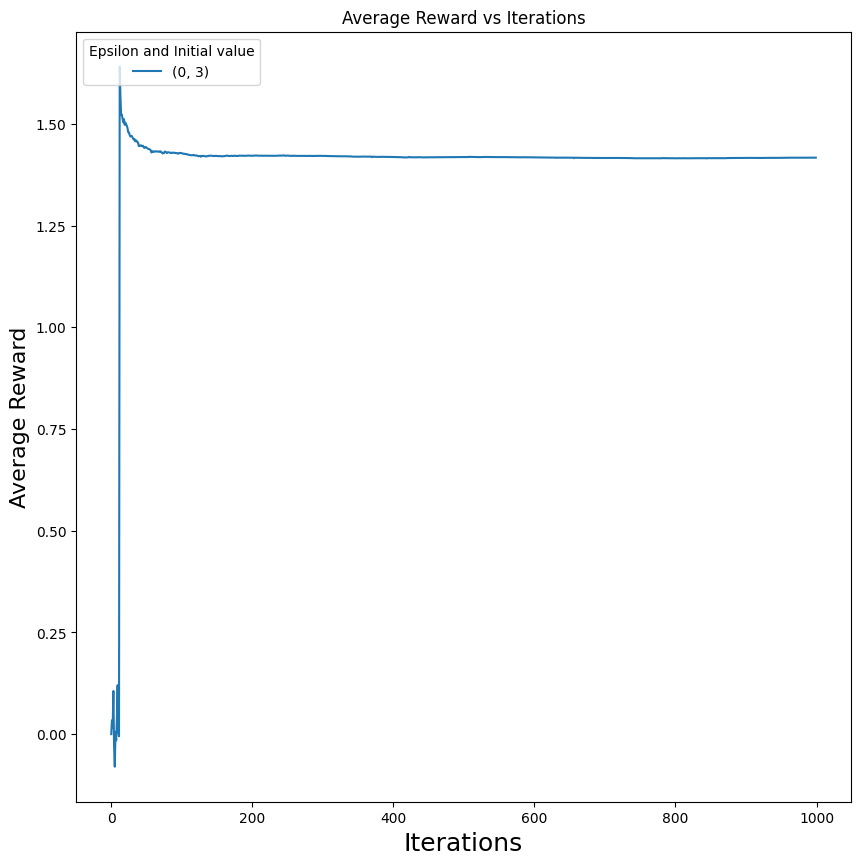

In [ ]:
epsilons      =    [0]
initial_values    =    [3]
reward_list       =    []

plt.figure(figsize=(10,10))
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Average Reward', fontsize=16)

for index, eps in enumerate(epsilons):
    avg_rewards_per_step = optimistic_greedy_2(steps, n_bandit, n_lever, testbed, initial_value, initial_reward_estimates, eps, reward_list)
    plt.plot(np.arange(steps),avg_rewards_per_step,label=(epsilons[index],initial_values[index]))

plt.legend(loc=2, ncol=2, title = 'Epsilon and Initial value')
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Iterations')
plt.show()

In [ ]:
def optimistic_greedy_3(steps, n_bandit, n_lever,initial_value,
                        testbed, initial_reward_estimates, epsilon, global_rewards):
    action_count = np.ones((n_bandit,n_lever))  # each lever is pulled atleast once
    reward_estimates = np.ones((n_bandit,n_lever)) * initial_value  # _per_pull_per_bandit

    print("Initial reward Value : ", str(reward_estimates[0][0]),", epsilon : ", str(epsilon)) # all will be identical
    optimal_choice_per_step = []
    step_size = 0.2

    for step in range(0,steps):
        sum_of_optimal_choice = 0

        for problem_index in range(n_bandit):
            if np.random.random() > epsilon:
                maxval = np.amax(reward_estimates[problem_index])
                max_val_indices = np.ravel(np.array(np.where(reward_estimates[problem_index] == maxval)))
                random_choice = np.random.choice(max_val_indices) # Breaking ties randomly
            else :
                 random_choice = np.random.randint(n_lever)

            if random_choice == np.argmax(testbed[problem_index]):
                sum_of_optimal_choice += 1

            # Incremental Algorithm
            Rn = np.random.normal(testbed[problem_index][random_choice],1)
            n = action_count[problem_index][random_choice]
            Qn = reward_estimates[problem_index][random_choice]

            Qnew = Qn + (step_size)*(Rn - Qn)

            reward_estimates[problem_index][random_choice] = Qnew
            action_count[problem_index][random_choice] = n+1

        optimal_choice_per_step.append((sum_of_optimal_choice/n_bandit)*100)
    global_rewards.append(optimal_choice_per_step)
    return

In [ ]:
# Produce a testbed of 1000 bandit problems
np.random.seed(71)
n_bandit = 1000
n_lever = 10
steps = 1000

testbed = np.random.normal(0,1,(n_bandit,n_lever))
initial_reward_estimates =  np.random.normal(testbed,1)

*Final run with Optimalistic Initial Values*

Initial reward Value :  5.0 , epsilon :  0
Initial reward Value :  0.0 , epsilon :  0.1


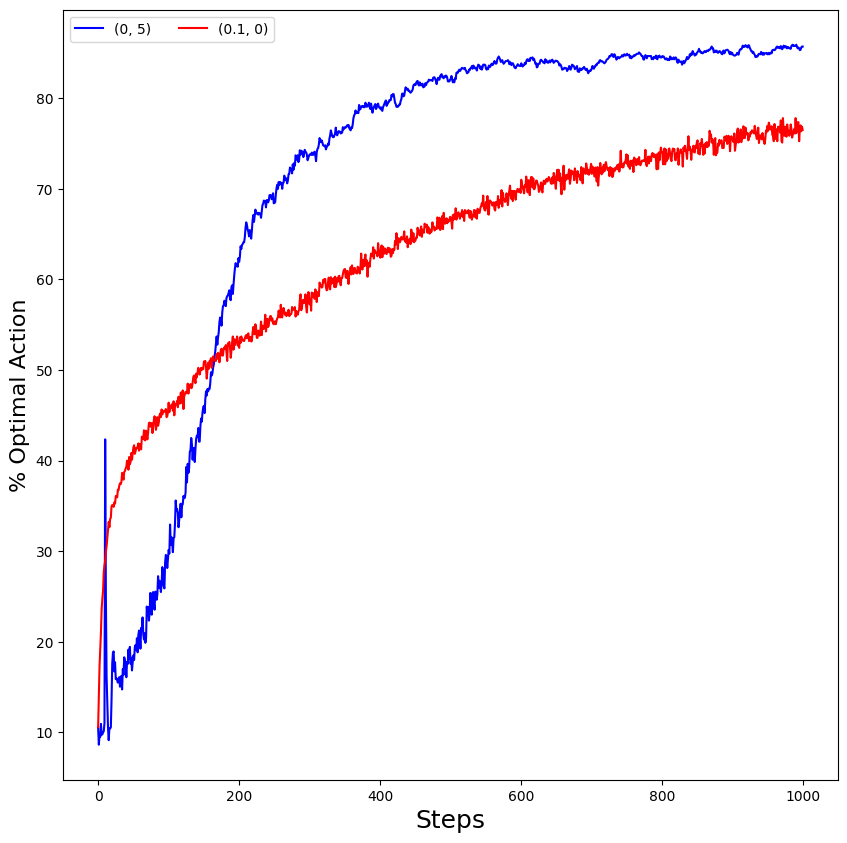

CPU times: user 2min 57s, sys: 4.86 s, total: 3min 2s
Wall time: 3min 24s


In [ ]:
global_rewards = []

epsilons      =    [0,   0.1]
initial_values    =    [5   ,  0]
colours        =    ['b' , 'r']

for index, eps in enumerate(epsilons):
    reward_list = []
    optimistic_greedy_3(steps, n_bandit, n_lever, initial_values[index],
                                                    testbed, initial_reward_estimates,
                                                    eps, reward_list)
    global_rewards.append(reward_list)

plt.figure(figsize=(10,10))
plt.xlabel('Steps', fontsize=18)
plt.ylabel('% Optimal Action', fontsize=16)
for  index in range(len(epsilons)):
    plt.plot(np.arange(steps),global_rewards[index][0],label=(epsilons[index],initial_values[index]), color=colours[index])

plt.legend(loc=2, ncol=2, title = 'Epsilon and Initial value')
plt.xlabel('Iterations')
plt.ylabel('% of optimal action')
plt.title('Percentage of time the optimal action is taken vs Iterations')
plt.show()

Initial reward Value :  3.0 , epsilon :  0


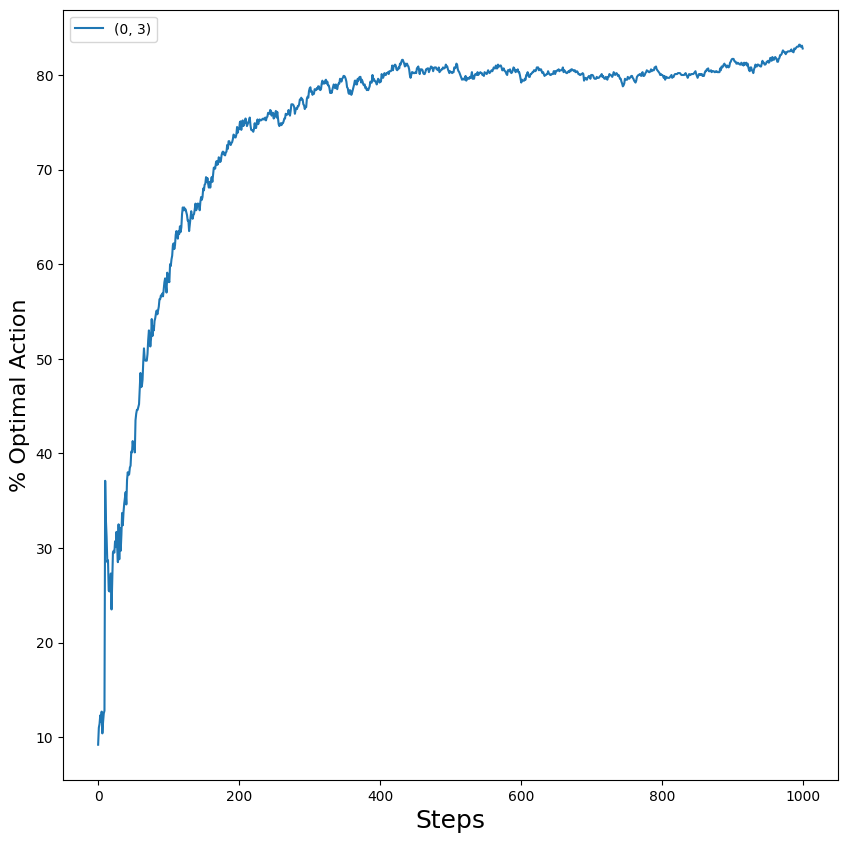

In [ ]:
global_rewards = []

epsilons      =    [0]
initial_values    =    [3]

for index, eps in enumerate(epsilons):
    reward_list = []
    optimistic_greedy_3(steps, n_bandit, n_lever, initial_values[index],
                                                    testbed, initial_reward_estimates,
                                                    eps, reward_list)
    global_rewards.append(reward_list)

plt.figure(figsize=(10,10))
plt.xlabel('Steps', fontsize=18)
plt.ylabel('% Optimal Action', fontsize=16)
for  index in range(len(epsilons)):
    plt.plot(np.arange(steps),global_rewards[index][0],label=(epsilons[index],initial_values[index]))

plt.legend(loc=2, ncol=2)

plt.show()

**Gradient Bandit algorithm** *- This learning approach maintains preferences for each action and uses gradient ascent to adjust these preferences based on received rewards.*

In [ ]:
def softmax_distribution(preference_estimates):
    maxval = np.amax(preference_estimates)
    exps = np.exp(preference_estimates - maxval) # Using Property of Softmax function, else exp can overflow

    return  exps / np.sum(exps, axis=0)

def gradient_bandit(steps, n_bandit, n_lever, step_size,is_baseline_applied,
          testbed, initial_reward_estimates, global_rewards):

    action_count = np.ones((n_bandit,n_lever))  # each lever is pulled atleast once
    Ravg = np.zeros((n_bandit,n_lever))  # avg_reward_estimates
    pref = np.zeros((n_bandit, n_lever)) # preference_estimates
    pr_a_t = np.zeros((n_bandit, n_lever)) # probability of action a at time t


    optimal_choice_per_step = []
    mean_reward = 0

    for step in range(0,steps):
        sum_of_optimal_choice = 0
        for b in range(n_bandit):

            pr_a_t[b] = softmax_distribution(pref[b])
            A = np.random.choice(np.arange(n_lever), p = pr_a_t[b])

            if A == np.argmax(testbed[b]):
                sum_of_optimal_choice += 1

            Rn = np.random.normal(testbed[b][A],1)

            if is_baseline_applied == True:
                n = step + 1
                mean_reward = (Rn + (n - 1) * mean_reward) / n

            expr = step_size * (Rn -mean_reward)
            pref[b][:A] = pref[b][:A] - (expr * pr_a_t[b][:A])
            pref[b][A+1:] = pref[b][A+1:] - (expr * pr_a_t[b][A+1:])

            pref[b][A] = pref [b][A] + (expr  * (1 - pr_a_t [b][A]))

        optimal_choice_per_step.append((sum_of_optimal_choice/n_bandit)*100)
    global_rewards.append(optimal_choice_per_step)
    return
# Produce a testbed of 2000 bandit problems
np.random.seed(71)
n_bandit = 1000
n_lever = 10
steps = 2000

# Shifting of reward baseline to 4
testbed = np.random.normal(4,1,(n_bandit,n_lever))
initial_reward_estimates =  np.random.normal(testbed,1)


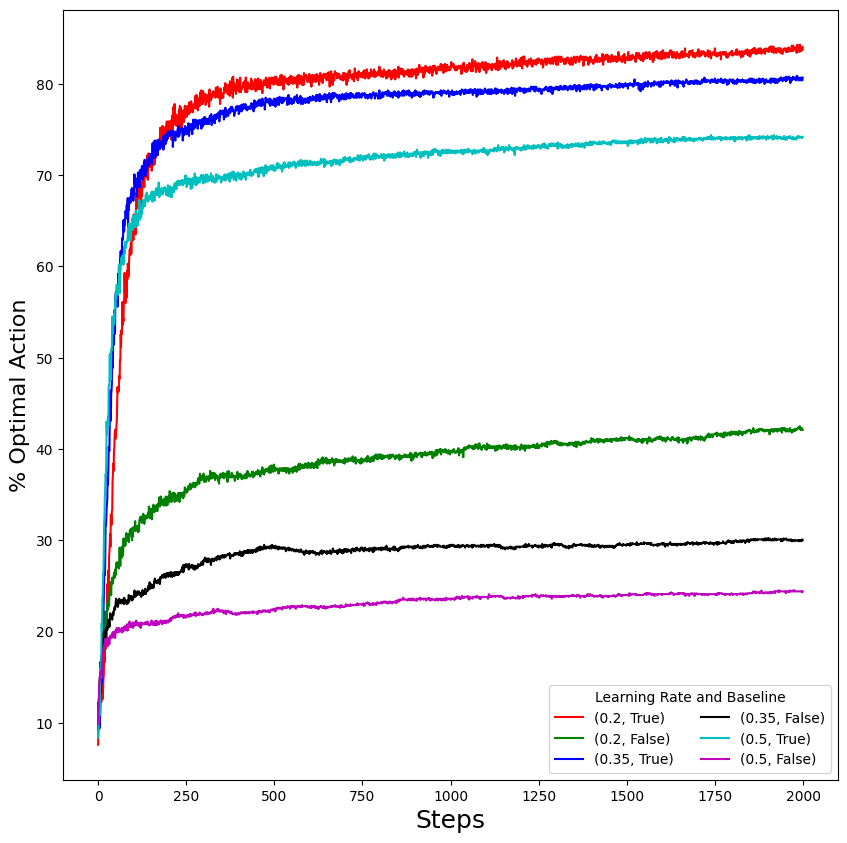

In [ ]:
# Initialize lists
global_rewards = []
apply_baseline = [True, False, True, False, True, False]
learning_rates = [0.2, 0.2, 0.35, 0.35, 0.5, 0.5]
colours = ['r', 'g', 'b', 'k', 'c', 'm']

# Loop through each configuration and execute the gradient_bandit function sequentially
for index, step_size in enumerate(learning_rates):
    reward_list = []
    gradient_bandit(steps, n_bandit, n_lever, step_size, apply_baseline[index], testbed, initial_reward_estimates, reward_list)
    global_rewards.append(reward_list)

# Plotting the results
plt.figure(figsize=(10, 10))
plt.xlabel('Steps', fontsize=18)
plt.ylabel('% Optimal Action', fontsize=16)

for index in range(len(learning_rates)):
    plt.plot(np.arange(steps), global_rewards[index][0], label=(learning_rates[index], apply_baseline[index]), color=colours[index])

plt.legend(loc='lower right', ncol=2, title='Learning Rate and Baseline')
plt.show()

# Part 2

**Abrupt change for E-greedy decreasing, E-greedy fixed and Optimistic greedy**

In [ ]:
epsilon_greedy_decreasing_step_size_results = []
epsilon_greedy_fixed_step_size_results = []
optimistic_greedy_results = []
for i in range(10000):
    # epsilon value = 0.05
    epsilon = 0.05
    np.random.seed()
    n_bandit = 1000
    n_lever = 10
    steps = 1000
    testbed = np.random.normal(0, 1, (n_bandit, n_lever))
    reward_estimates = np.zeros((n_bandit, n_lever))
    action_count = np.ones((n_bandit, n_lever))  # each lever is pulled atleast once
    initial_reward_estimates = np.random.normal(testbed, 1)

    # optimistic greedy
    initial_value = 3.0
    avg_rewards_per_step = optimistic_greedy(steps, n_bandit, n_lever, testbed, initial_value, initial_reward_estimates, epsilon, apply_abrupt_changes = True)
    optimistic_greedy_results.append(avg_rewards_per_step[-1])

    # Episilon greedy with fixed step size
    avg_rewards_per_step = epsilon_greedy(steps, n_bandit, n_lever, testbed, initial_reward_estimates, epsilon, apply_abrupt_changes = True, apply_fixed_step_size_changes = True)
    epsilon_greedy_fixed_step_size_results.append(avg_rewards_per_step[-1])

    # Episilon greedy with decreasing step size
    avg_rewards_per_step = epsilon_greedy(steps, n_bandit, n_lever, testbed, initial_reward_estimates, epsilon, apply_abrupt_changes = True)
    epsilon_greedy_decreasing_step_size_results.append(avg_rewards_per_step[-1])



<ipython-input-49-3850dae8f80d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='variable', y='value', data=pd.melt(df), palette=my_colors).set(


[Text(0.5, 0, 'Bandit Algorithm'),
 Text(0, 0.5, 'Average Reward'),
 Text(0.5, 1.0, 'Abrupt change box plot')]

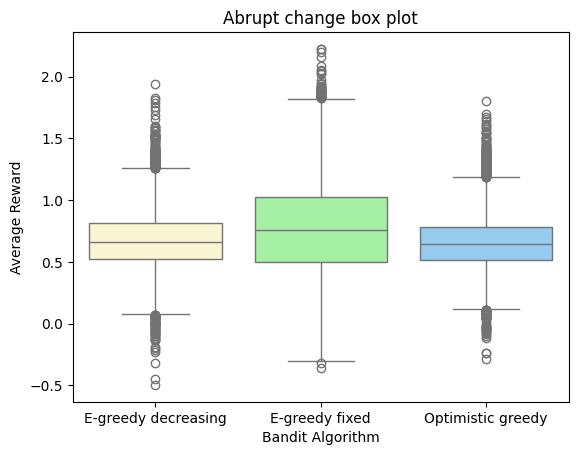

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

df = pd.DataFrame({'E-greedy decreasing': epsilon_greedy_decreasing_step_size_results,
                   'E-greedy fixed': epsilon_greedy_fixed_step_size_results,
                   'Optimistic greedy': optimistic_greedy_results})
my_colors = {'E-greedy decreasing': 'lemonchiffon', 'E-greedy fixed': 'palegreen', 'Optimistic greedy': 'lightskyblue'}

sns.boxplot(x='variable', y='value', data=pd.melt(df), palette=my_colors).set(
            xlabel='Bandit Algorithm',
            ylabel='Average Reward',
            title='Abrupt change box plot')

**Drift change for E-greedy decreasing, E-greedy fixed and Optimistic greedy**

In [ ]:
epsilon_greedy_decreasing_step_size_results = []
epsilon_greedy_fixed_step_size_results = []
optimistic_greedy_results = []
for i in range(10000):
    # epsilon value = 0.05
    epsilon = 0.05
    np.random.seed()
    n_bandit = 1000
    n_lever = 10
    steps = 1000
    testbed = np.random.normal(0, 1, (n_bandit, n_lever))
    reward_estimates = np.zeros((n_bandit, n_lever))
    action_count = np.ones((n_bandit, n_lever))  # each lever is pulled atleast once
    initial_reward_estimates = np.random.normal(testbed, 1)

    # optimistic greedy
    initial_value = 3.0
    avg_rewards_per_step = optimistic_greedy(steps, n_bandit, n_lever, testbed, initial_value, initial_reward_estimates, epsilon, apply_gradual_changes = True, epsilon_t_upper_limit = 0.000001)
    optimistic_greedy_results.append(avg_rewards_per_step[-1])

    # Episilon greedy with fixed step size
    avg_rewards_per_step = epsilon_greedy(steps, n_bandit, n_lever, testbed, initial_reward_estimates, epsilon, apply_gradual_changes = True, apply_fixed_step_size_changes = True, epsilon_t_upper_limit = 0.000001)
    epsilon_greedy_fixed_step_size_results.append(avg_rewards_per_step[-1])

    # Episilon greedy with decreasing step size
    avg_rewards_per_step = epsilon_greedy(steps, n_bandit, n_lever, testbed, initial_reward_estimates, epsilon, apply_gradual_changes = True, epsilon_t_upper_limit = 0.000001)
    epsilon_greedy_decreasing_step_size_results.append(avg_rewards_per_step[-1])



<ipython-input-52-16edd3425caf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='variable', y='value', data=pd.melt(df), palette=my_colors).set(


[Text(0.5, 0, 'Bandit Algorithm'),
 Text(0, 0.5, 'Average Reward'),
 Text(0.5, 1.0, 'Drift change box plot')]

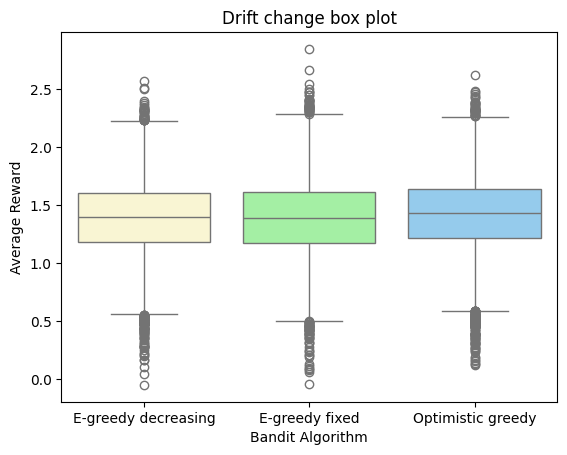

In [ ]:
df = pd.DataFrame({'E-greedy decreasing': epsilon_greedy_decreasing_step_size_results,
                   'E-greedy fixed': epsilon_greedy_fixed_step_size_results,
                   'Optimistic greedy': optimistic_greedy_results})
my_colors = {'E-greedy decreasing': 'lemonchiffon', 'E-greedy fixed': 'palegreen', 'Optimistic greedy': 'lightskyblue'}

sns.boxplot(x='variable', y='value', data=pd.melt(df), palette=my_colors).set(
            xlabel='Bandit Algorithm',
            ylabel='Average Reward',
            title='Drift change box plot')

**Mean-reverting change for E-greedy decreasing, E-greedy fixed and Optimistic greedy**

In [ ]:
epsilon_greedy_decreasing_step_size_results = []
epsilon_greedy_fixed_step_size_results = []
optimistic_greedy_results = []
for i in range(10000):
    # epsilon value = 0.05
    epsilon = 0.05
    np.random.seed()
    n_bandit = 1000
    n_lever = 10
    steps = 1000
    testbed = np.random.normal(0, 1, (n_bandit, n_lever))
    reward_estimates = np.zeros((n_bandit, n_lever))
    action_count = np.ones((n_bandit, n_lever))  # each lever is pulled atleast once
    initial_reward_estimates = np.random.normal(testbed, 1)

    # optimistic greedy
    initial_value = 3.0
    avg_rewards_per_step = optimistic_greedy(steps, n_bandit, n_lever, testbed, initial_value, initial_reward_estimates, epsilon, apply_gradual_changes = True, k=0.5)
    optimistic_greedy_results.append(avg_rewards_per_step[-1])

    # Episilon greedy with fixed step size
    avg_rewards_per_step = epsilon_greedy(steps, n_bandit, n_lever, testbed, initial_reward_estimates, epsilon, apply_gradual_changes = True, k=0.5, apply_fixed_step_size_changes = True)
    epsilon_greedy_fixed_step_size_results.append(avg_rewards_per_step[-1])

    # Episilon greedy with decreasing step size
    avg_rewards_per_step = epsilon_greedy(steps, n_bandit, n_lever, testbed, initial_reward_estimates, epsilon, apply_gradual_changes = True, k=0.5)
    epsilon_greedy_decreasing_step_size_results.append(avg_rewards_per_step[-1])



<ipython-input-55-d4cc965219ec>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='variable', y='value', data=pd.melt(df), palette=my_colors).set(


[Text(0.5, 0, 'Bandit Algorithm'),
 Text(0, 0.5, 'Average Reward'),
 Text(0.5, 1.0, 'Mean-reverting change box plot')]

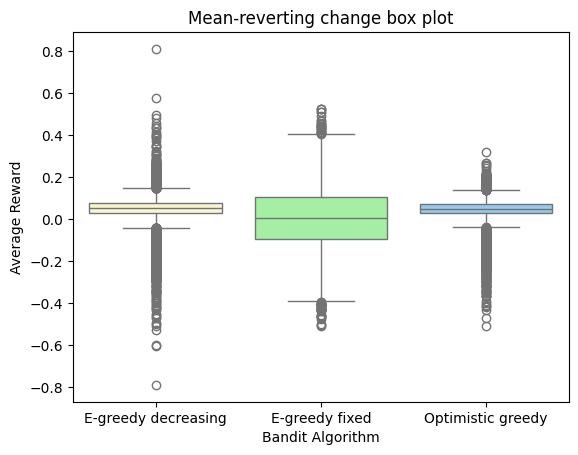

In [ ]:
df = pd.DataFrame({'E-greedy decreasing': epsilon_greedy_decreasing_step_size_results,
                   'E-greedy fixed': epsilon_greedy_fixed_step_size_results,
                   'Optimistic greedy': optimistic_greedy_results})
my_colors = {'E-greedy decreasing': 'lemonchiffon', 'E-greedy fixed': 'palegreen', 'Optimistic greedy': 'lightskyblue'}

sns.boxplot(x='variable', y='value', data=pd.melt(df), palette=my_colors).set(
            xlabel='Bandit Algorithm',
            ylabel='Average Reward',
            title='Mean-reverting change box plot')